## Measure of Central Tendency : Mean

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import math
import scipy.stats

In [2]:
df_nyc = pd.read_csv('nyc-rolling-sales.csv', na_values=['n/a', 'na', '-', '--', ' -  '])
df_nyc.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00


In [3]:
df_nyc.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [4]:
df_nyc['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
     

In [5]:
df_nyc.isna().sum() # mencari data null

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [6]:
df_nyc['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '37 RELIGIOUS FACILITIES                    ',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
       '46 CONDO STORE BUILDINGS                   ',
       '47 CONDO NON-BUSINESS STORAGE              ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWE

In [7]:
"""
Memilih tempat di Astoria
"""
df_astoria = df_nyc[df_nyc['NEIGHBORHOOD'] == 'ASTORIA']
df_astoria.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
49607,209,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,534,28,,S1,30-83 14TH STREET,...,1,1,2,2426.0,2512.0,1920,1,S1,NaN,2017-01-25 00:00:00
49608,210,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,552,19,,S1,21-10 31ST AVENUE,...,1,1,2,2850.0,3276.0,1984,1,S1,2500000.0,2017-04-12 00:00:00
49609,211,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,565,42,,A5,23-21 33RD ROAD,...,1,0,1,1566.0,1224.0,1945,1,A5,625000.0,2017-03-23 00:00:00
49610,212,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,565,42,,A5,23-21 33RD ROAD,...,1,0,1,1566.0,1224.0,1945,1,A5,550000.0,2016-12-09 00:00:00
49611,213,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,622,60,,A3,32-36 35TH STREET,...,1,0,1,2500.0,1204.0,1920,1,A3,NaN,2017-07-12 00:00:00


In [8]:
df_astoria[df_astoria['RESIDENTIAL UNITS'] == 1]
# df_astoria[df_astoria['BUILDING CLASS AT PRESENT'] != df_astoria['BUILDING CLASS AT TIME OF SALE'] ]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
49607,209,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,534,28,,S1,30-83 14TH STREET,...,1,1,2,2426.0,2512.0,1920,1,S1,NaN,2017-01-25 00:00:00
49608,210,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,552,19,,S1,21-10 31ST AVENUE,...,1,1,2,2850.0,3276.0,1984,1,S1,2500000.0,2017-04-12 00:00:00
49609,211,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,565,42,,A5,23-21 33RD ROAD,...,1,0,1,1566.0,1224.0,1945,1,A5,625000.0,2017-03-23 00:00:00
49610,212,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,565,42,,A5,23-21 33RD ROAD,...,1,0,1,1566.0,1224.0,1945,1,A5,550000.0,2016-12-09 00:00:00
49611,213,4,ASTORIA,01 ONE FAMILY DWELLINGS,1,622,60,,A3,32-36 35TH STREET,...,1,0,1,2500.0,1204.0,1920,1,A3,NaN,2017-07-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50622,1224,4,ASTORIA,22 STORE BUILDINGS,4,624,38,,K4,3402 31 AVE,...,1,2,3,2020.0,3920.0,1924,4,K4,NaN,2017-08-15 00:00:00
50631,1233,4,ASTORIA,22 STORE BUILDINGS,4,661,41,,K2,37-17 30TH AVENUE,...,1,2,3,2513.0,4046.0,1928,4,K2,NaN,2017-01-24 00:00:00
50634,1236,4,ASTORIA,22 STORE BUILDINGS,4,684,16,,K4,25-73 STEINWAY STREET,...,1,2,3,1728.0,3660.0,1920,4,K4,NaN,2017-05-25 00:00:00
50635,1237,4,ASTORIA,22 STORE BUILDINGS,4,684,16,,K4,25-73 STEINWAY STREET,...,1,2,3,1728.0,3660.0,1920,4,K4,NaN,2017-03-02 00:00:00


In [9]:
df_astoria['LAND SQUARE FEET'] = pd.to_numeric(df_astoria['LAND SQUARE FEET'])
df_astoria['LAND SQUARE FEET']

C:\Users\inayah\AppData\Local\Temp\ipykernel_1692\2090589393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_astoria['LAND SQUARE FEET'] = pd.to_numeric(df_astoria['LAND SQUARE FEET'])


49607    2426.0
49608    2850.0
49609    1566.0
49610    1566.0
49611    2500.0
          ...  
50818       NaN
50819       NaN
50820       NaN
50821       NaN
50822       NaN
Name: LAND SQUARE FEET, Length: 1216, dtype: float64

In [10]:
df_astoria_one_resident = df_astoria[(df_astoria['RESIDENTIAL UNITS'] == 1) & 
           (df_astoria['TOTAL UNITS'] == 1) & 
           (~df_astoria['GROSS SQUARE FEET'].isna()) & 
           (~df_astoria['LAND SQUARE FEET'].isna())]

In [11]:
"""
Menghitung rata-rata unit total di Astoria
"""
print(df_astoria_one_resident['GROSS SQUARE FEET'].mean())
print(df_astoria_one_resident['LAND SQUARE FEET'].mean())

1367.9032258064517
2155.2795698924733


## Measure of Central Tendency : Median

In [12]:
"""
Menghitung median unit total di Astoria
"""
print(df_astoria_one_resident['GROSS SQUARE FEET'].median())
print(df_astoria_one_resident['LAND SQUARE FEET'].median())

1357.0
2000.0


## Measure of Central Tendency : Mode

In [13]:
"""
Menghitung mode unit total di Astoria
"""

print(df_astoria_one_resident['GROSS SQUARE FEET'].mode())
print(df_astoria_one_resident['LAND SQUARE FEET'].mode())

0    960.0
Name: GROSS SQUARE FEET, dtype: float64
0    2000.0
Name: LAND SQUARE FEET, dtype: float64


## Measure of Spread : Range

In [14]:
print(np.ptp(df_astoria_one_resident['GROSS SQUARE FEET'])) 
print(np.ptp(df_astoria_one_resident['LAND SQUARE FEET'])) 

2142.0
6036.0


## Measure of Spread : Variance

In [15]:
print(df_astoria_one_resident['GROSS SQUARE FEET'].var())
print(df_astoria_one_resident['LAND SQUARE FEET'].var())

134188.15357643753
651869.877512857


## Measure of Spread : Standard Deviation

In [16]:
print(statistics.stdev(df_astoria_one_resident['GROSS SQUARE FEET']))
print(statistics.stdev(df_astoria_one_resident['LAND SQUARE FEET']))

366.31701240378885
807.3845908319383


## Probability Distribution

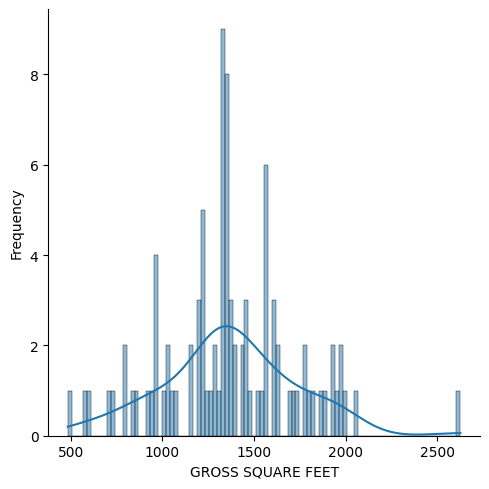

In [17]:
ax = sns.displot(df_astoria_one_resident['GROSS SQUARE FEET'],
                 kde=True,
                 bins=100,
                )
ax.set_titles('Probability Distribution for Gross Square Feet in Astoria')
ax.set_ylabels('Frequency')

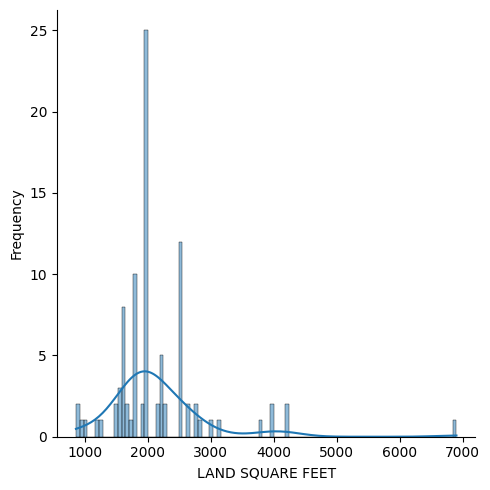

In [18]:
ax = sns.displot(df_astoria_one_resident['LAND SQUARE FEET'],
                 kde=True,
                 bins=100,
                )
ax.set_titles('Probability Distribution for land Square Feet in Astoria')
ax.set_ylabels('Frequency')

## Confidence Intervals

In [19]:
# df_astoria_one_resident[df_astoria_one_resident['BUILDING CLASS AT PRESENT'] == 'A2']
x = df_astoria['BUILDING CLASS AT PRESENT'].unique()
y = df_astoria_one_resident['BUILDING CLASS AT PRESENT'].unique()
print(x, y, sep='\n')

['S1' 'A5' 'A3' 'A1' 'A2' 'A9' 'B1' 'B2' 'B3' 'S2' 'B9' 'C0' 'R3' 'R6'
 'V0' 'V2' 'G0' 'C1' 'C2' 'C4' 'C3' 'C7' 'D1' 'C6' 'D4' 'RR' 'R2' 'R4' ' '
 'S4' 'S3' 'S9' 'S5' 'R1' 'R9' 'O7' 'O5' 'K1' 'K4' 'K2' 'K9' 'F5' 'F4'
 'V1' 'G6' 'G1' 'G7' 'E9' 'E1' 'E2' 'W4' 'P6' 'Q9' 'RB' 'RG' 'RP' 'RK'
 'RS']
['A5' 'A3' 'A1' 'A2' 'A9']


In [20]:
# Menghitung mean, n, z, dan standar deviasi

mean_aor = df_astoria_one_resident['LAND SQUARE FEET'].mean()
n_aor = df_astoria_one_resident['LAND SQUARE FEET'].count()
sd_aor = statistics.stdev(df_astoria_one_resident['LAND SQUARE FEET'])
z = 1.96 #95%
sd_aor

807.3845908319383

In [21]:
lcb = mean_aor - z * (sd_aor/np.sqrt(n_aor))
ucb = mean_aor + z * (sd_aor/np.sqrt(n_aor))

lcb, ucb

(1991.184681219041, 2319.3744585659056)

## Hypothesis Testing

In [22]:
from scipy.stats import pearsonr
alpha = 0.05

In [23]:
stat, p = pearsonr(df_astoria_one_resident['LAND SQUARE FEET'], df_astoria_one_resident['GROSS SQUARE FEET'])
print('stat: ', stat , ' p: ' ,p)
if p > alpha:
    print('Keduanya independen')
else:
    print('keduanya dependen')

stat:  0.155586858188736  p:  0.1364300990232598
Keduanya independen


# Analisys

Saya menganalisis data pada wilayah Astoria dengan objeknya adalah LAND SQUARE FEET dan GROSS SQUARE FEET dengan kondisi masing-masing memiliki satu residen dan total unit hanya satu.

- Dalam pengukuran Measure of Central Tedency, rata-rata keduanya berbeda cukup jauh. Untuk GSF mendapatkan 1367.9032258064517 dan LSF mendapatkan 2155.2795698924733 . Titik tengah GSF yaitu 1357 dan LSF yaitu 2000. Untuk mode, GSF yaitu 960 dan LSF yaitu 2000.

- Dalam pengukuran measure of spread , range yang didapat adalah 2142 untuk GSF dan 6036 untuk LSF. Untuk variance, GSF mendapatkan 134188.1535764376 dan LSF mendapatkan 651869.8775128565 . Terakhir, standard deviation GSF adalah 366.31701240378885 dan standard deviation LSF adalah 807.3845908319383

- Distribusi probabilitas terlihat seperti distribusi normal. Untuk Confidence Interval, saya hanya mengambil LSF saja. Hasil CI berada di antara 1991.184681219041 - 2319.3744585659056 .